# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [22]:
import math
import sys

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [24]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=cols)
print(df.sample(10))

     sepal_length  sepal_width  petal_length  petal_width            class
15            5.7          4.4           1.5          0.4      Iris-setosa
2             4.7          3.2           1.3          0.2      Iris-setosa
20            5.4          3.4           1.7          0.2      Iris-setosa
61            5.9          3.0           4.2          1.5  Iris-versicolor
148           6.2          3.4           5.4          2.3   Iris-virginica
14            5.8          4.0           1.2          0.2      Iris-setosa
56            6.3          3.3           4.7          1.6  Iris-versicolor
99            5.7          2.8           4.1          1.3  Iris-versicolor
146           6.3          2.5           5.0          1.9   Iris-virginica
119           6.0          2.2           5.0          1.5   Iris-virginica


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [25]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


sepal_length: The length of the sepal in centimeters.

sepal_width: The width of the sepal in centimeters.

petal_length: The length of the petal in centimeters.

petal_width: The width of the petal in centimeters.

class: The species of the Iris plant

### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

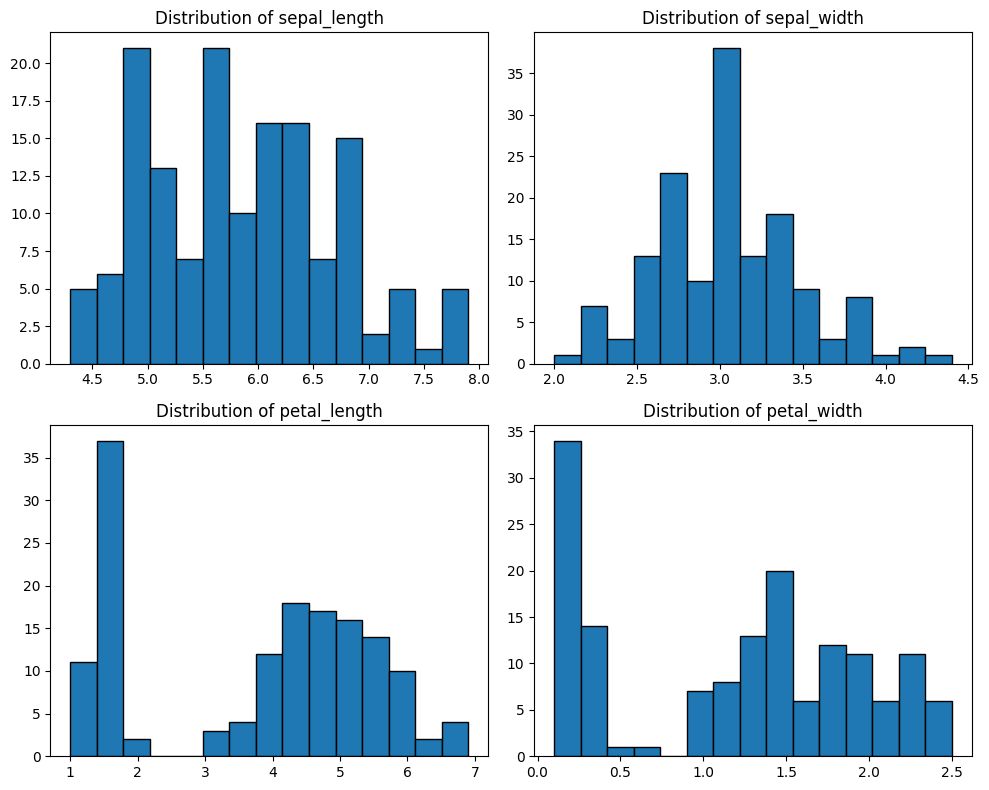

In [26]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    ax = axes[i//2, i%2]
    df[col].hist(ax=ax, bins=15, grid=False, edgecolor='black')
    ax.set_title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

sepal_length: This distribution looks roughly Normal , though slightly flattened. It is unimodal and symmetric.

sepal_width: This appears to be a Normal distribution. It is fairly symmetric and bell-shaped around the mean of ~3.0.

petal_length: This is a Bimodal distribution. There is a clear separation between a smaller group and a larger group.

petal_width: This is also Bimodal. There is a peak for small values (around 0.2) and a broader distribution for larger values.

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

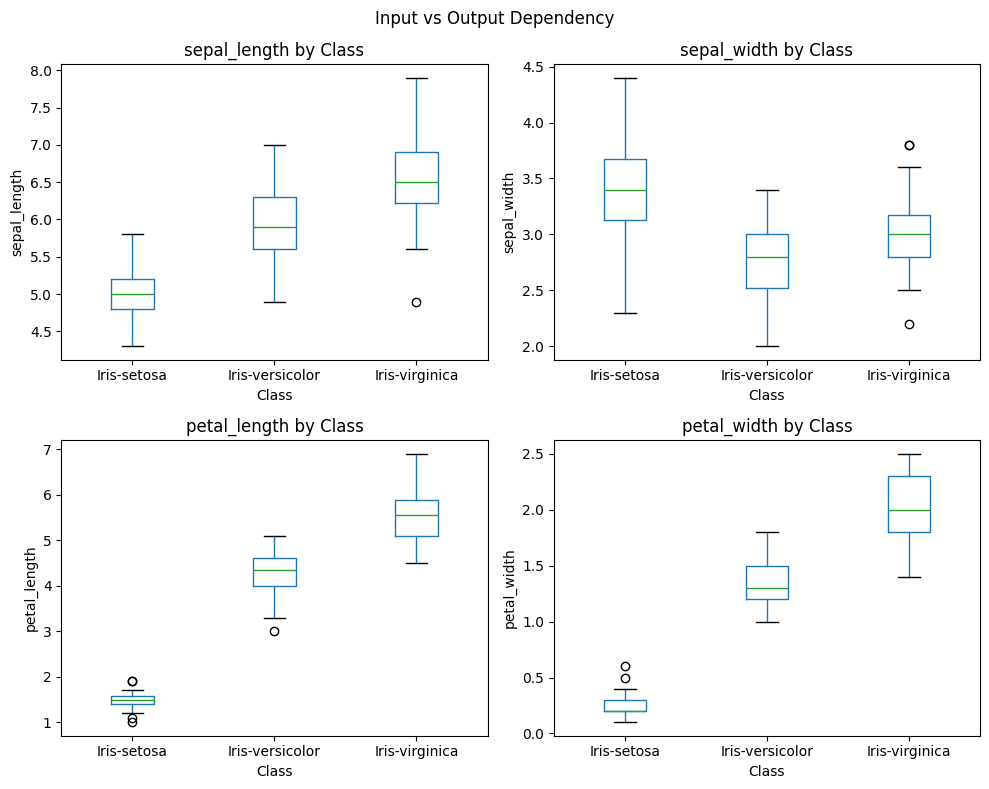

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
for i, col in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    ax = axes[i//2, i%2]
    df.boxplot(column=col, by='class', ax=ax, grid=False)
    ax.set_title(f'{col} by Class')
    ax.set_xlabel('Class')
    ax.set_ylabel(col)
plt.suptitle('Input vs Output Dependency')
plt.tight_layout()
plt.show()

sepal_length vs Class: Not Independent. The boxplot shows that Virginica tends to have the longest sepals, followed by Versicolor, and then Setosa. There is a clear trend.

sepal_width vs Class: Not Independent (but weaker). Setosa has clearly wider sepals than the other two. However, there is significant overlap between Versicolor and Virginica.

petal_length vs Class: Not Independent. This is a very strong dependency. Setosa has very short petals, Versicolor has medium, and Virginica has long petals, with almost no overlap.

petal_width vs Class: Not Independent. Similar to petal length, there is a very strong relationship where width increases from Setosa to Versicolor to Virginica.

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

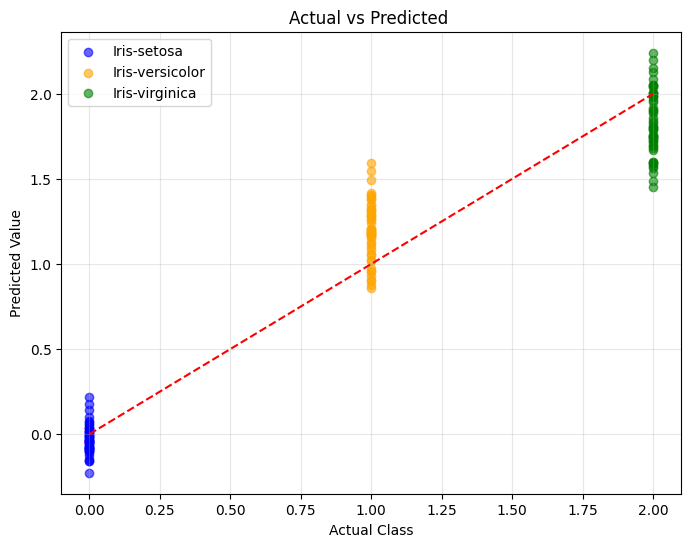

Mean Squared Error (MSE): 0.046385088311226945


In [41]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv('iris.data', header=None, names=cols)

class_map = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['target'] = df['class'].map(class_map)

X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['target']

# 2. Model
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# 3. Plot with Legend
plt.figure(figsize=(8, 6))

# Define colors and labels for the groups
colors = ['blue', 'orange', 'green']
species = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Iterate through each class (0, 1, 2) and plot its points separately
for i, spec in enumerate(species):
    # Select only the data points belonging to the current class
    mask = (y == i)
    # Plot Actual vs Predicted for this class
    plt.scatter(y[mask], y_pred[mask], alpha=0.6, c=colors[i], label=spec)

# Add the perfect prediction line (y=x)
plt.plot([0, 2], [0, 2], 'r--')

# Add labels and legend
plt.xlabel("Actual Class")
plt.ylabel("Predicted Value")
plt.title("Actual vs Predicted ")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# 5. Calculate MSE
mse = np.mean((y - y_pred)**2)
print(f"Mean Squared Error (MSE): {mse}")



MSE = ~ 0.0464.

 The plot shows predictions clustering tightly around the true integer values ('Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2), indicating a good fit.

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [42]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
best_mse = float('inf')
best_feat = ''

for col in features:
    X_feat = df[[col]]
    model_feat = sklearn.linear_model.LinearRegression()
    model_feat.fit(X_feat, y)
    pred_feat = model_feat.predict(X_feat)
    mse_feat = np.mean((y - pred_feat)**2)
    print(f"Feature: {col}, MSE: {mse_feat:.4f}")
    
    if mse_feat < best_mse:
        best_mse = mse_feat
        best_feat = col

print(f"\nBest Feature: {best_feat} (MSE: {best_mse:.4f})")

Feature: sepal_length, MSE: 0.2584
Feature: sepal_width, MSE: 0.5494
Feature: petal_length, MSE: 0.0662
Feature: petal_width, MSE: 0.0568

Best Feature: petal_width (MSE: 0.0568)


Best Feature: petal_width with an MSE of 0.0568.
The single feature model (0.0568) is only slightly worse than the all-feature model (0.0464), suggesting petal_width has the best predictive power.

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

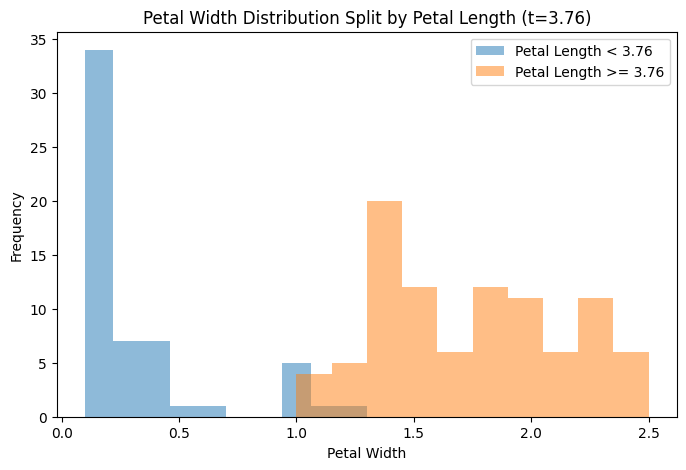

In [43]:
# Chosen pair: petal_length (to split) and petal_width (to plot)
threshold = df['petal_length'].mean()
mask_low = df['petal_length'] < threshold
mask_high = df['petal_length'] >= threshold

plt.figure(figsize=(8, 5))
plt.hist(df[mask_low]['petal_width'], alpha=0.5, label=f'Petal Length < {threshold:.2f}', bins=10)
plt.hist(df[mask_high]['petal_width'], alpha=0.5, label=f'Petal Length >= {threshold:.2f}', bins=10)
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.title(f"Petal Width Distribution Split by Petal Length (t={threshold:.2f})")
plt.legend()
plt.show()

The histogram shows two completely separate distributions. When petal_length is low, petal_width is low. When petal_length is high, petal_width is high. This visualizes the strong positive correlation.

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

Explained Variance Ratios: [0.92461621 0.05301557 0.01718514 0.00518309]
Variance explained by first 2 components: 0.9776
MSE (PCA Top 2): 0.0607


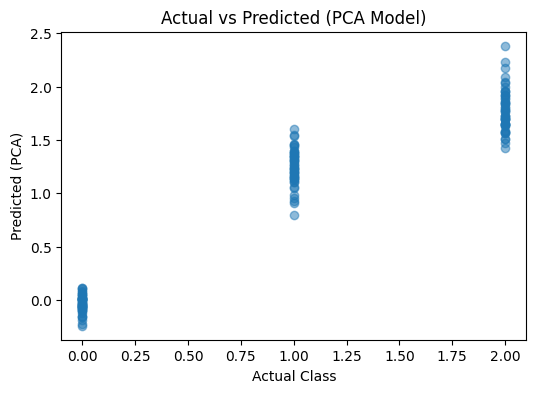

In [44]:
pca = PCA()
X_pca = pca.fit_transform(X_all)

# Explained Variance
explained_variance = pca.explained_variance_ratio_
first_half_variance = sum(explained_variance[:2])
print(f"Explained Variance Ratios: {explained_variance}")
print(f"Variance explained by first 2 components: {first_half_variance:.4f}")

# Regression on first 2 components
X_pca_2 = X_pca[:, :2]
model_pca = sklearn.linear_model.LinearRegression()
model_pca.fit(X_pca_2, y)
y_pred_pca = model_pca.predict(X_pca_2)
mse_pca = np.mean((y - y_pred_pca)**2)
print(f"MSE (PCA Top 2): {mse_pca:.4f}")

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(y, y_pred_pca, alpha=0.5)
plt.xlabel("Actual Class")
plt.ylabel("Predicted (PCA)")
plt.title("Actual vs Predicted (PCA Model)")
plt.show()

The first two components explain 97.77% of the variance.

MSE = 0.0607; This is slightly higher than the full model (0.0464) but very close, proving that dimensionality reduction retained the most critical information.

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [ ]:
correlation_matrix = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr()
print("Correlation Matrix:")
print(correlation_matrix)



Correlation Matrix:
              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


Highest Correlation: Between petal_length and petal_width (0.96).

The first principal component accounts for 92% of the variance because it aligns with the direction where these two correlated variables vary together.

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

Max Z-score: 3.1147
Location: Row 15, Column 'sepal_width'
Outlier Row Data:
sepal_length            5.7
sepal_width             4.4
petal_length            1.5
petal_width             0.4
class           Iris-setosa
target                    0
Name: 15, dtype: object


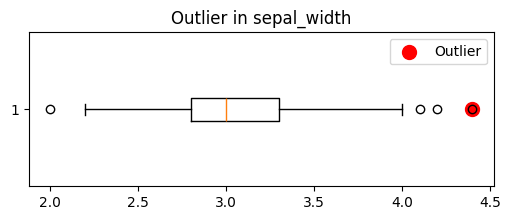

In [46]:
z_scores = np.abs(scipy.stats.zscore(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]))

# Find the indices of the maximum Z-score in the entire table
max_z_score = np.max(z_scores)
row_idx, col_idx = np.unravel_index(np.argmax(z_scores, axis=None), z_scores.shape)
col_name = df.columns[col_idx]

print(f"Max Z-score: {max_z_score:.4f}")
print(f"Location: Row {row_idx}, Column '{col_name}'")
print("Outlier Row Data:")
print(df.iloc[row_idx])

# Visualization
plt.figure(figsize=(6, 2))
plt.boxplot(df[col_name], vert=False)
plt.scatter([df.iloc[row_idx, col_idx]], [1], c='red', s=100, label='Outlier')
plt.title(f"Outlier in {col_name}")
plt.legend()
plt.show()

Outlier: Row 15, sepal_width.

Criteria: Z-score of 3.11 and the outlier is 4.4

Visualization: The red dot in the boxplot sits far outside the whiskers, visually confirming it is an anomaly compared to the rest of the distribution.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

https://gemini.google.com/share/92769d1d173c